In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


total_file = pd.read_excel("C:/Data/Studies/Projects/Amlan_sir/Training-8th_in Xls form.xls")
total_file = total_file.drop(labels='Reference', axis=1)
print(total_file)
data = np.array(total_file.iloc[:, :])
#Y = np.array(total_file.iloc[:, 15])
#print(X)
#print(Y)



          C    Mn      S     Si      P      N     Nb     Ti     Al  \
0    0.0021  0.53  0.012  0.001  0.029  0.002  0.006  0.008  0.047   
1    0.0021  0.53  0.012  0.001  0.029  0.002  0.006  0.008  0.047   
2    0.0021  0.53  0.012  0.001  0.029  0.002  0.006  0.008  0.047   
3    0.0021  0.53  0.012  0.001  0.029  0.002  0.006  0.008  0.047   
4    0.0021  0.53  0.012  0.001  0.029  0.002  0.006  0.008  0.047   
..      ...   ...    ...    ...    ...    ...    ...    ...    ...   
616  0.0300  0.25  0.007  0.016  0.007  0.003  0.000  0.000  0.050   
617  0.0300  0.25  0.007  0.016  0.007  0.003  0.000  0.000  0.050   
618  0.0300  0.25  0.007  0.016  0.007  0.003  0.000  0.000  0.050   
619  0.0300  0.25  0.007  0.016  0.007  0.003  0.000  0.000  0.050   
620  0.0300  0.25  0.007  0.016  0.007  0.003  0.000  0.000  0.050   

     AnnealTemp  AnnealTimSec  Prestrain%  PrestrTem  AgingTem  \
0           820            80           1         25       100   
1           820            

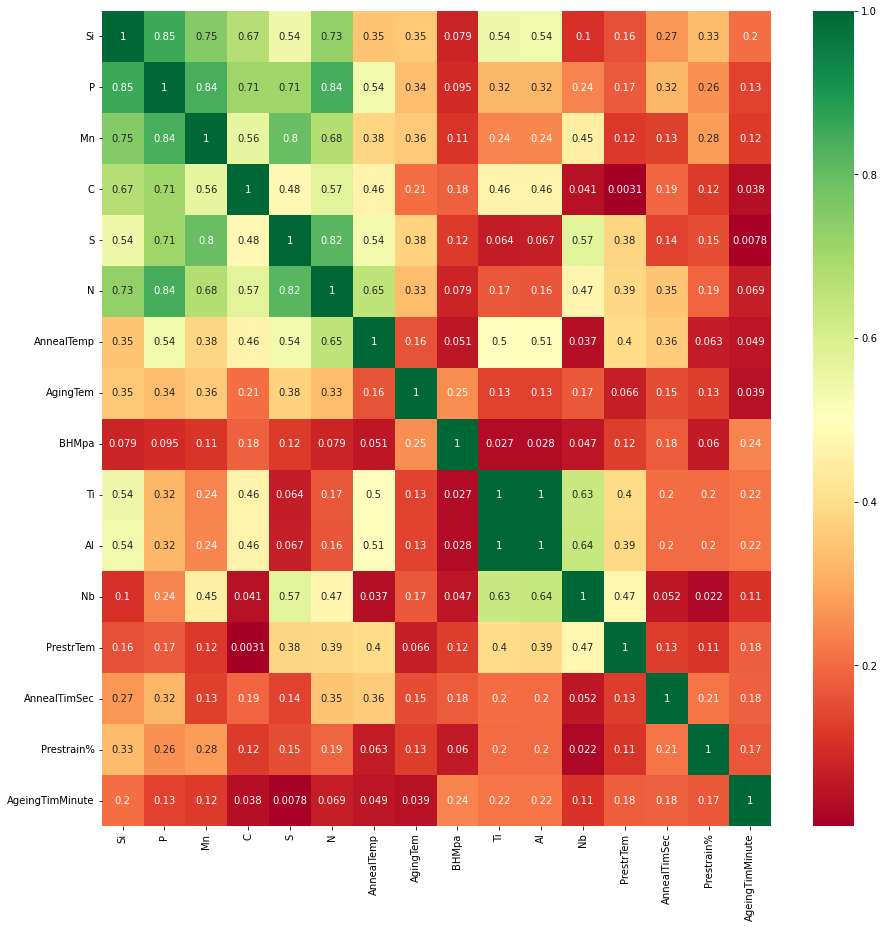

In [6]:
corrmat = total_file.corr(method = 'kendall')

#mask = np.triu(np.ones_like(corrmat, dtype=bool))

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - abs(corrmat)
Z = linkage(squareform(dissimilarity), 'complete')
labels = fcluster(Z, 0., criterion='distance')

labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(total_file.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(total_file[i])
    else:
        df_to_append = pd.DataFrame(total_file[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)
        
correlations = clustered.corr(method = 'kendall')

plt.figure(figsize=(15, 15))
g = seaborn.heatmap(abs(correlations), annot=True, mask=None, cmap="RdYlGn")
plt.show()

